In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df =pd.read_csv('haberman.csv')
print(df.shape)
print(df.head(10))

(306, 4)
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
5   33    58     10       1
6   33    60      0       1
7   34    59      0       2
8   34    66      9       2
9   34    58     30       1


In [3]:
df.columns #what are the colums

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [4]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [5]:
df['status'].value_counts()
# num of pateients belong to class1 and class2
# 225 patients belong to class1,  class1 means pateints survive >=5 years after surgery
# 81 pateints belong to class2,   class2 means pateints not survive <5 years after surgery

1    225
2     81
Name: status, dtype: int64

**Pairplot to get to idea how the data is distributed or is it seperable**

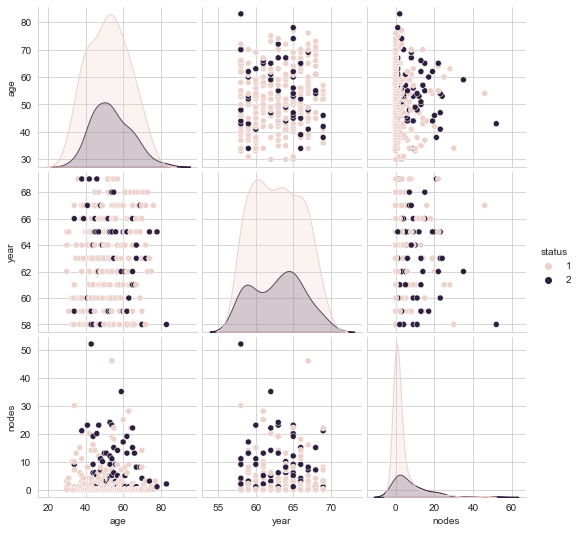

In [6]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", height=2.5,kind='scatter' );
plt.show()
# most of the plots are not seperable but the plot node vs age is better from all so
# i will continue my observation from this plot nodes vs age

**1-D Scatter plot**

NODES


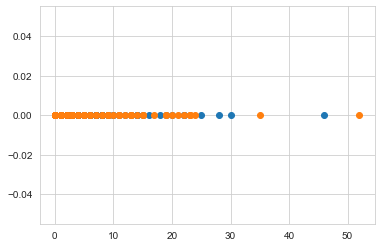

AGE


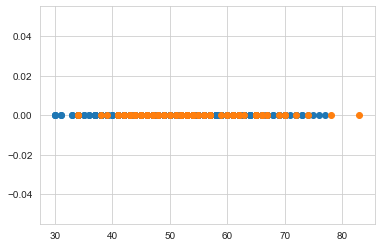

In [7]:
import numpy as np
df_status1 = df.loc[df["status"] == 1];
df_status2 = df.loc[df["status"] == 2];
print('NODES')
plt.plot(df_status1["nodes"], np.zeros_like(df_status1["nodes"]), 'o')
plt.plot(df_status2["nodes"], np.zeros_like(df_status2["nodes"]), 'o')
plt.show()

print('AGE')
plt.plot(df_status1["age"], np.zeros_like(df_status1["age"]), 'o')
plt.plot(df_status2["age"], np.zeros_like(df_status2["age"]), 'o')


plt.show()

 Histogram, PDF, CDF

C:\Users\Sameer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sameer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


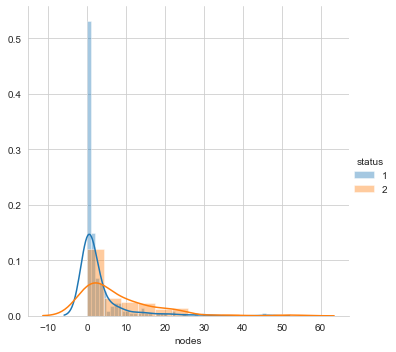

In [8]:
sns.FacetGrid(df,hue='status',height=5).map(sns.distplot,'nodes').add_legend()
plt.show()
# if nodes<=0
#patients ==long survival survive >= 5 years after surgery 
# if nodes>0 and nodes<=4:
# patient=short  survival < 5 years after surgery
    


C:\Users\Sameer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sameer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


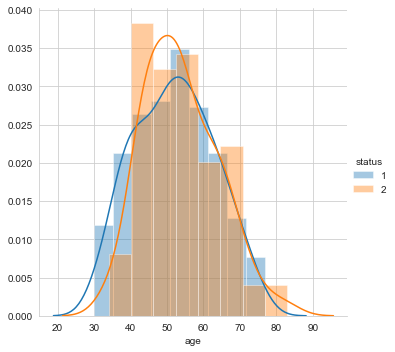

In [9]:
sns.FacetGrid(df,hue='status',height=5).map(sns.distplot,'age').add_legend()
plt.show()
# pdf of survival and non survival is overlap
# its hard to interupt

C:\Users\Sameer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sameer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


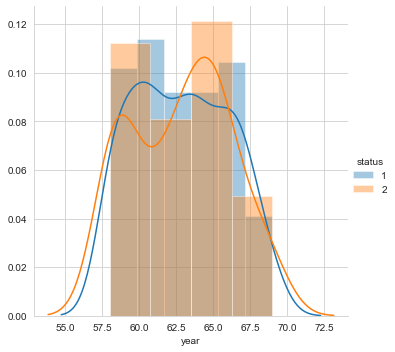

In [10]:
sns.FacetGrid(df,hue='status',height=5).map(sns.distplot,'year').add_legend()
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


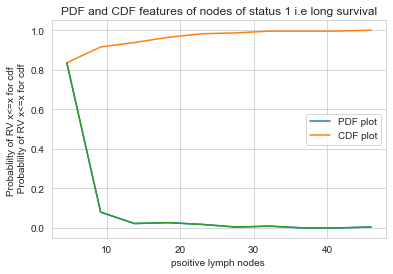

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


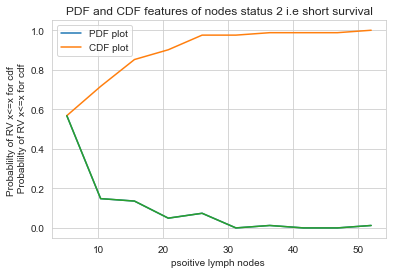

In [11]:
#Plot CDF of nodes
import numpy as np

counts, bin_edges = np.histogram(df_status1["nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_status1["nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.title('PDF and CDF features of nodes of status 1 i.e long survival')
plt.xlabel("psoitive lymph nodes ")
plt.ylabel("Probablilty of RV x<=x for cdf \n Probablilty of RV x<=x for cdf")
plt.legend(["PDF plot", "CDF plot"])

plt.show();

counts, bin_edges = np.histogram(df_status2["nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_status2["nodes"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.title('PDF and CDF features of nodes status 2 i.e short survival')
plt.xlabel("psoitive lymph nodes ")
plt.ylabel("Probablilty of RV x<=x for cdf \n Probablilty of RV x<=x for cdf")
plt.legend(("PDF plot", "CDF plot"))

plt.show()



# what i get from cdf of nodes is 85% are chances of survival if nodes are less than 5
# patient=long survive if nodes<=5

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


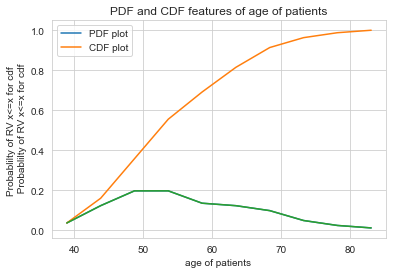

In [12]:
#Plot CDF of age

counts, bin_edges = np.histogram(df_status2["age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_status2["age"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.title('PDF and CDF features of age of patients')
plt.xlabel("age of patients ")
plt.ylabel("Probablilty of RV x<=x for cdf \n Probablilty of RV x<=x for cdf")
plt.legend(["PDF plot", "CDF plot"])

plt.show()
# in Short survival nearly 55% of people who have nodes less than 5 and 
# there are nearly 100% of people in short survival if nodes are > 38

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


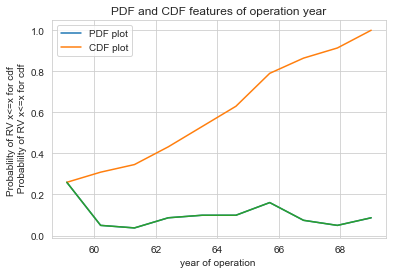

In [13]:
counts, bin_edges = np.histogram(df_status2["year"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(df_status2["year"], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.title('PDF and CDF features of operation year')
plt.xlabel("year of operation ")
plt.ylabel("Probablilty of RV x<=x for cdf \n Probablilty of RV x<=x for cdf")
plt.legend(["PDF plot", "CDF plot"])

plt.show()

In [14]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(df_status1["nodes"])) #avg nodes of long survival is 2.5 people survive long if nodes are less
print(np.mean(df_status2["nodes"])) #avg nodes of short survival is 7.45 people survive less num of year if nodes are more

print("\nStd-dev:")
print(np.std(df_status1["nodes"]))

print(np.std(df_status2["nodes"]))


Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


**Median, Percentile, Quantile, IQR, MAD**

In [15]:
print("\nMedians:")
print(np.median(df_status1["nodes"])) #people who have zero nodes survive long 
print(np.median(df_status2["nodes"])) #avg nodes in short survival is 4

print("\nQuantiles:")
print(np.percentile(df_status1["nodes"],np.arange(0, 100, 25))) #50%people have zero nodes and 25% people have nodes less than 3 and 25% have nodes greator than 3 
print(np.percentile(df_status2["nodes"],np.arange(0, 100, 25))) #25% people have 1 nodes and 75% people have 11 node

print("\n90th Percentiles:")
print(np.percentile(df_status1["nodes"],90)) #90% people have minimum 8 nodes 
print(np.percentile(df_status2["nodes"],90)) #90% people have minimum 20 nodes

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df_status1["nodes"]))
print(robust.mad(df_status2["nodes"]))






Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


**Box plot and Whiskers**


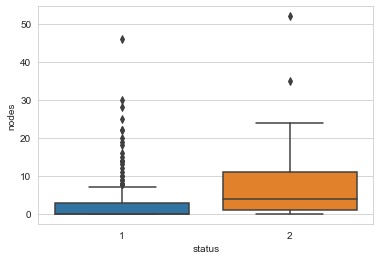

In [16]:
sns.boxplot(x='status',y='nodes', data=df)
plt.show()
# Box_plot is a representation of mean median and percentile

**Violin Plot**

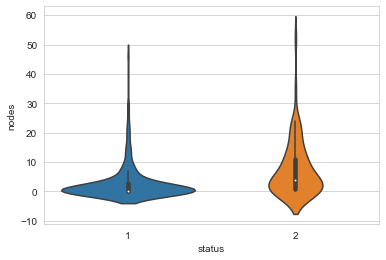

In [17]:
sns.violinplot(x='status',y='nodes', height=5,data=df)
plt.show()

**Summary or Conclusion**

**What i conclude from Haberman dataset that we can daignous cancer patient 
if people have less node or somehow we detect node on early stage so we can treat people and save people.
from pairplot 



1-plot between nodes and year of treatment gives best isualization and seperable .

2-the people with zero nodes 100% survive**


**from PDF and CDF**

1.82% of people survive if the nodes is less than 5 i.e the life of patient increase after treatment if the patient have nodes less than 5.

2.75% people who survive have nodes in range[0,3] i.e 75percentile give 3 nodes in box plot



**Observation**

1:-we can treat people from cancer if we detect earliar and treat people.

2:-The propbablity of survival is high if the nodes is less than 5.

3:-82% people survive who have nodes <=5.
